In [2]:
import tensorflow as tf
print("TF version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TF version: 2.10.0
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Epoch 1/50
469/469 - 2s - loss: 0.4012 - accuracy: 0.8946 - val_loss: 0.1741 - val_accuracy: 0.9508 - 2s/epoch - 3ms/step
Epoch 2/50
469/469 - 1s - loss: 0.1427 - accuracy: 0.9593 - val_loss: 0.1167 - val_accuracy: 0.9654 - 699ms/epoch - 1ms/step
Epoch 3/50
469/469 - 1s - loss: 0.0976 - accuracy: 0.9719 - val_loss: 0.0910 - val_accuracy: 0.9718 - 698ms/epoch - 1ms/step
Epoch 4/50
469/469 - 1s - loss: 0.0686 - accuracy: 0.9799 - val_loss: 0.0812 - val_accuracy: 0.9744 - 697ms/epoch - 1ms/step
Epoch 5/50
469/469 - 1s - loss: 0.0537 - accuracy: 0.9843 - val_loss: 0.0717 - val_accuracy: 0.9775 - 685ms/epoch - 1ms/step
Epoch 6/50
469/469 - 1s - loss: 0.0402 - accuracy: 0.9887 - val_loss: 0.0734 - val_accuracy: 0.9772 - 686ms/epoch - 1ms/step
Epoch 7/50
469/469 - 1s - loss: 0.0304 - accuracy: 0.9914 - val_loss: 0.0669 - val_accuracy: 0.9794 - 701ms/epoch - 1ms/step
Epoch 8/50
469/469 - 1s - loss: 0.0232 - accuracy: 0.9938 - val_loss: 0.0738 - val_accuracy: 0.9772 - 689ms/epoch - 1ms/step
Epo

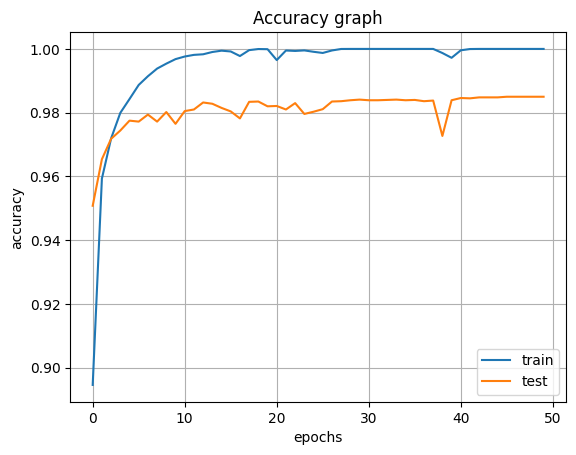

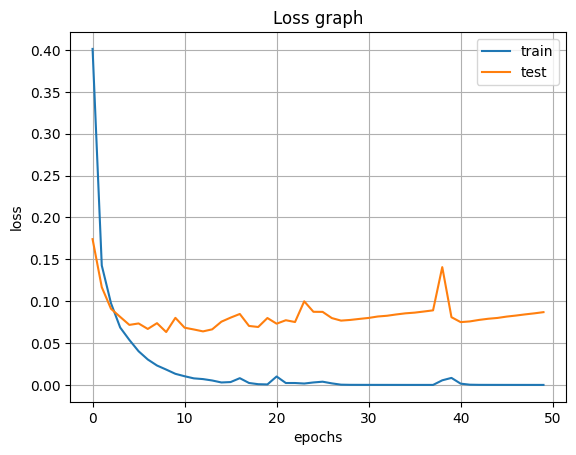

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

# Sequential 모델, Dense Layer, Adam Optimizer 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋 로드 (훈련/테스트 분리)
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

# 28x28 이미지를 1차원 벡터(784)로 reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 데이터 타입을 float32로 변환하고 0~1 사이로 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# 레이블을 One-hot 인코딩으로 변환 (0~9 → 벡터)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 다층 퍼셉트론(Multilayer Perceptron) 모델 정의
dmlp = Sequential()
# 입력층(784) → 은닉층(1024), ReLU 활성화 함수
dmlp.add(Dense(units=1024, activation='relu', input_shape=(784,)))
# 은닉층(512), ReLU
dmlp.add(Dense(units=512, activation='relu'))
# 은닉층(512), ReLU
dmlp.add(Dense(units=512, activation='relu'))
# 출력층(10), Softmax로 클래스 확률 출력
dmlp.add(Dense(units=10, activation='softmax'))

# 모델 컴파일
# 손실 함수: 다중 클래스 분류 → categorical_crossentropy
# 옵티마이저: Adam (learning_rate=0.0001)
# 평가 지표: 정확도(accuracy)
dmlp.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# 모델 학습
# 배치 크기: 128
# 에폭: 50
# 검증 데이터: x_test, y_test
# verbose=2: 한 줄씩 epoch 정보 출력
hist = dmlp.fit(
    x_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(x_test, y_test),
    verbose=2
)

# 테스트 데이터 정확도 출력
print('정확률 =', dmlp.evaluate(x_test, y_test, verbose=0)[1] * 100)

# 학습된 모델 저장 (.h5 파일)
dmlp.save('dmlp_trained.h5')

# 정확도 그래프 출력 (Train vs Test)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

# 손실 함수 그래프 출력 (Train vs Test)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()
